In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [14]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [15]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


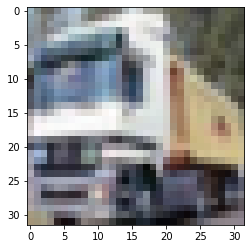

In [16]:
plt.imshow(x_train[1])

In [17]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [18]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [19]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

# applying early stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001, patience=3)

In [21]:
def results(model):
  epoch = 100
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val),callbacks=[earlystop_callback] , verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  return r
  

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

# cnn

 - steps in cnn:
  1. convolution
  2. pooling
  3. flattening
  4. full connection

# cnn eg
- feature learning
  - image input
  - convolution+relu
  - pooling
  - convolution+relu
  - pooling
- classification
  - flatten
  - fully connected
  - softmax 

- complete cnn in one view
  - on input image, we apply diff types of filters tp create many feature maps, forming the convolutional layer, and in the pooling layer, pooling is applied on those feature maps

# Hyperparameters
Let’s now only consider a convolution layer ignoring pooling, and go over the hyperparameter choices we need to make. 

We have 4 important hyperparameters to decide on:

- Filter size: we typically use 3x3 filters, but 5x5 or 7x7 are also used depending on the application. There are also 1x1 filters which we will explore in another article, at first sight it might look strange but they have interesting applications. Remember that these filters are 3D and have a depth dimension as well, but since the depth of a filter at a given layer is equal to the depth of its input, we omit that.

- Filter count: this is the most variable parameter, it’s a power of two anywhere between 32 and 1024. Using more filters results in a more powerful model, but we risk overfitting due to increased parameter count. Usually we start with a small number of filters at the initial layers, and progressively increase the count as we go deeper into the network.

- Stride: we keep it at the default value 1.

- Padding: we usually use padding.

In [22]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

r=results(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1562/1562 [==============================] - 500s 319ms/step - loss: 1.6717 - accuracy: 0.4079 - val_loss: 1.4648 - val_accuracy: 0.5034
Epoch 2/100
1562/1562 [==============================] - 480s 307ms/step - loss: 1.3532 - accuracy: 0.5242 - val_loss: 1.2986 - val_accuracy: 0.5568
Epoch 3/100
1562/1562 [==============================] - 477s 305ms/step - loss: 1.2133 - accuracy: 0.5793 - val_loss: 1.1386 - val_accuracy: 0.6226
Epoch 4/100
1562/1562 [==============================] - 479s 306ms/step - loss: 1.1156 - accuracy: 0.6092 - val_loss: 0.9878 - val_accuracy: 0.6644
Epoch 5/100
1562/1562 [==============================] - 484s 310ms/step - loss: 1.0420 - accuracy: 0.6436 - val_loss: 1.0890 - val_accuracy: 0.6484
Epoch 6/100
1562/1562 [==============================] - 488s 313ms/step - loss: 0.9842 - accuracy: 0.6634 - val_loss: 0.9360 - val_accuracy: 0.6908
Epoch 7/100
1562/1562 [==============================] - 509s 326ms/step - loss: 0.9386 - accuracy: 0.6834

In [25]:
model.save("modelsep14.hdf5")

In [23]:
x=r

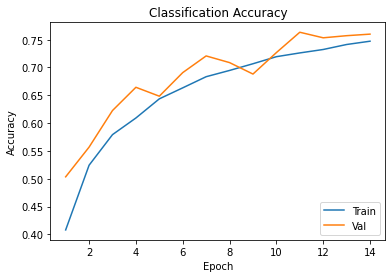

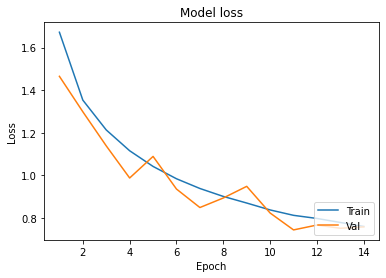

In [24]:
epoch_range = range(1, 14+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

  # Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

https://buffml.com/convolutional-neural-networks/

https://www.saama.com/different-kinds-convolutional-filters/